In [1]:
###########
# Generic #
###########
import os
from pathlib import Path
import sys

########
# Libs #
########
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import skimage.io as io
from pycocotools.coco import COCO
from PIL import Image

##########
# Custom #
##########
# sys.path.append('.')
from eda_pipeline import DataExplorer


###########
# Configs #
###########
SRC_DIR = Path.cwd().parent.parent
DATA_DIR = os.path.join(SRC_DIR, "data", "life3-aut0")
RAW_IMG_DIR = os.path.join(DATA_DIR, "raw")
PROCESSED_DIR = os.path.join(DATA_DIR, "processed")
ANNOT_DIR = os.path.join(PROCESSED_DIR, "annotations_all.csv")
ANNOT_FILE_NAME = 'annotations_all.csv'

%load_ext autoreload
%autoreload 2

## Instantiate DExplorer

In [2]:
# Load annotation data
annot_df = pd.read_csv(ANNOT_DIR, index_col=0)

# instantiate data explorer
DExplorer = DataExplorer()

In [3]:
annot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35043 entries, 0 to 35042
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image_id       35043 non-null  int64  
 1   category_id    35043 non-null  int64  
 2   area           35043 non-null  float64
 3   width          35043 non-null  int64  
 4   height         35043 non-null  int64  
 5   file_name      35043 non-null  object 
 6   category_name  35043 non-null  object 
 7   bbox_x         35043 non-null  float64
 8   bbox_y         35043 non-null  float64
 9   bbox_width     35043 non-null  float64
 10  bbox_height    35043 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 3.2+ MB


## Summary statistics

In [4]:
annot_df.describe()

,image_id,category_id,area,width,height,bbox_x,bbox_y,bbox_width,bbox_height
count,35043.000000,35043.000000,35043.000000,35043.0,35043.0,35043.000000,35043.000000,35043.000000,35043.000000
mean,9.723654,1.033901,309.265939,1920.0,1080.0,955.058185,529.183600,16.853259,16.686709
std,5.676781,0.251116,208.755302,0.0,0.0,553.217543,312.625284,5.533984,5.506306
min,1.000000,1.000000,9.280000,1920.0,1080.0,0.000000,0.000000,2.520000,2.240000
25%,6.000000,1.000000,170.180000,1920.0,1080.0,478.730000,258.235000,13.100000,13.000000
50%,7.000000,1.000000,262.190000,1920.0,1080.0,957.120000,526.860000,16.390000,16.200000
75%,13.000000,1.000000,412.270250,1920.0,1080.0,1429.900000,798.295000,20.415000,20.300000
max,25.000000,3.000000,6298.704000,1920.0,1080.0,1916.800000,1077.760000,84.320000,86.580000


In [5]:
annot_df.head()

,image_id,category_id,area,width,height,file_name,category_name,bbox_x,bbox_y,bbox_width,bbox_height
0,1,1,254.340,1920,1080,55.jpg,Cells,929.35,347.72,15.7,16.20
1,1,1,200.830,1920,1080,55.jpg,Cells,898.51,268.14,13.3,15.10
2,1,1,175.140,1920,1080,55.jpg,Cells,816.00,226.40,12.6,13.90
3,1,1,226.953,1920,1080,55.jpg,Cells,834.49,150.77,15.1,15.03
4,1,1,268.800,1920,1080,55.jpg,Cells,817.64,99.86,16.0,16.80


In [6]:
# count the number of images 
print("Number of images: ", annot_df['file_name'].nunique())

Number of images:  99


## Plotting distributions

### Class distribution

Cells                              34386
cell accumulation (large cells)      531
cell accumulation (small cells)      126
Name: category_name, dtype: int64


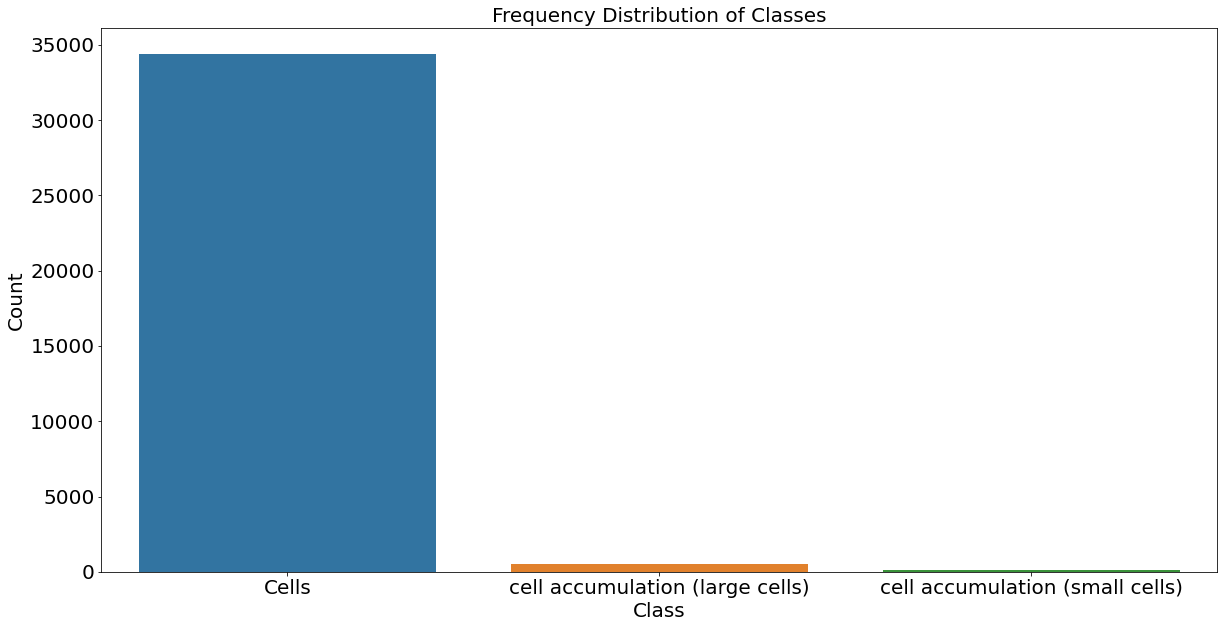

In [7]:
DExplorer.plot_label_distribution(annot_df, class_col='category_name')

### Class distribution (after remerging the cell accumulation classes)

In [8]:
# reassign the column categories
column_dict = {
    "Cells": "Cells", 
    "cell accumulation (large cells)": "cell accumulation", 
    "cell accumulation (small cells)":"cell accumulation"
    }
    
new_annot_df = DExplorer.remap_col_cat(
    df=annot_df, 
    old_col_name='category_name', 
    new_col_name='category_name_regrp', 
    col_dict=column_dict
)

Cells                34386
cell accumulation      657
Name: category_name_regrp, dtype: int64


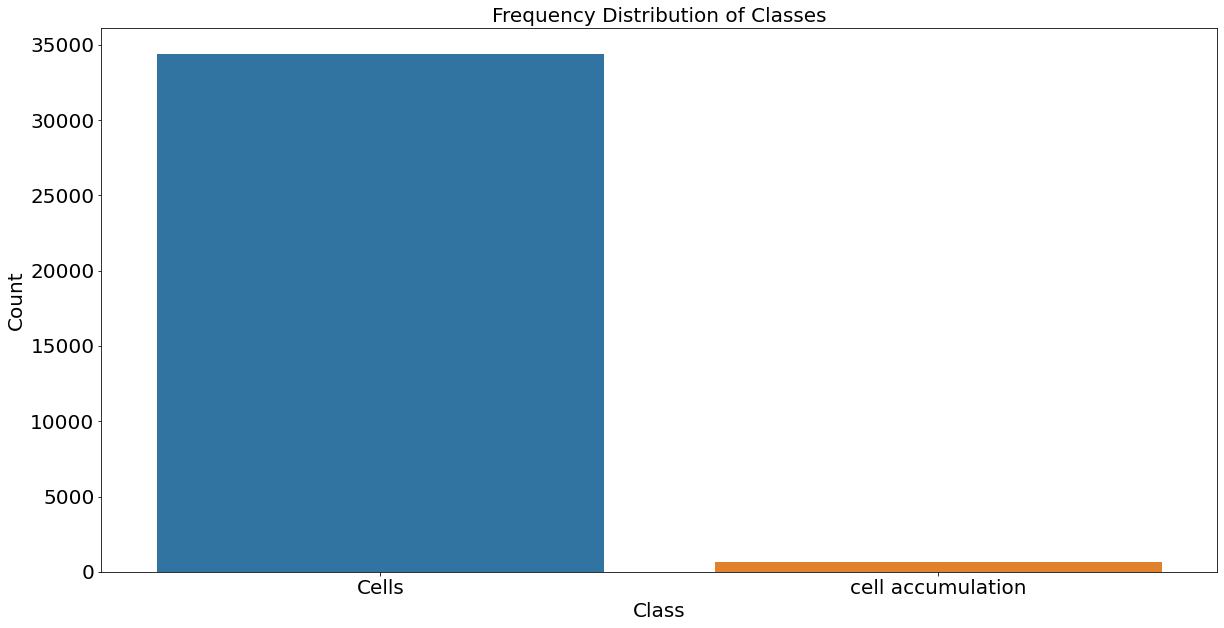

In [9]:
DExplorer.plot_label_distribution(new_annot_df, class_col='category_name_regrp')

### Bounding box midpoint distribution

<Figure size 5760x5760 with 0 Axes>

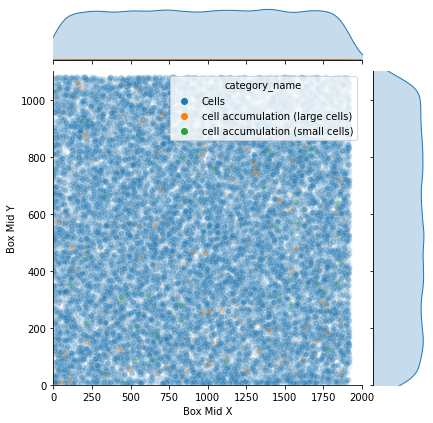

In [10]:
DExplorer.plot_box_mid_pt(
    df=annot_df, 
    group_by_col='category_name', 
    plot_dim=(80, 80),
    x_limit=(0,2000),
    y_limit=(0,1100),
    alpha=0.1
)

### Bounding box size distribution

<Figure size 2880x2880 with 0 Axes>

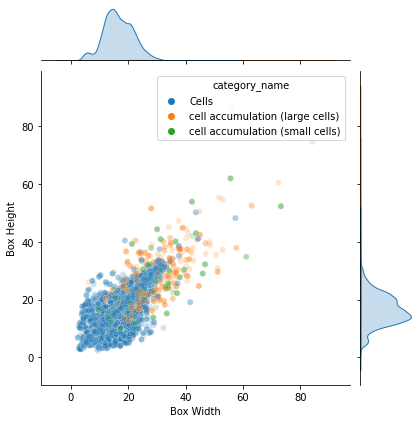

In [11]:
DExplorer.plot_box_wh(
    df=annot_df, 
    x_col='bbox_width', 
    y_col='bbox_height', 
    group_by_col='category_name',
    plot_dim=(40,40),
    alpha=0.2
)

In [12]:
# select the longest length
annot_df = DExplorer.get_max_dim(
    df=annot_df, 
    new_col_name="longest_length", 
    col_list=["bbox_width", "bbox_height"]
)


In [13]:
# display dataframe
annot_df

,image_id,category_id,area,width,height,file_name,category_name,bbox_x,bbox_y,bbox_width,bbox_height,category_name_regrp,longest_length
0,1,1,254.340,1920,1080,55.jpg,Cells,929.35,347.72,15.70,16.20,Cells,16.20
1,1,1,200.830,1920,1080,55.jpg,Cells,898.51,268.14,13.30,15.10,Cells,15.10
2,1,1,175.140,1920,1080,55.jpg,Cells,816.00,226.40,12.60,13.90,Cells,13.90
3,1,1,226.953,1920,1080,55.jpg,Cells,834.49,150.77,15.10,15.03,Cells,15.10
4,1,1,268.800,1920,1080,55.jpg,Cells,817.64,99.86,16.00,16.80,Cells,16.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35038,19,3,256.289,1920,1080,81.jpg,cell accumulation (large cells),1620.04,190.30,20.26,12.65,cell accumulation (large cells),20.26
35039,20,3,596.960,1920,1080,80.jpg,cell accumulation (large cells),1839.40,708.20,32.80,18.20,cell accumulation (large cells),32.80
35040,22,3,1518.440,1920,1080,78.jpg,cell accumulation (large cells),966.92,442.68,40.60,37.40,cell accumulation (large cells),40.60
35041,23,3,1417.400,1920,1080,77.jpg,cell accumulation (large cells),884.28,446.39,38.00,37.30,cell accumulation (large cells),38.00


       longest_length
count    35043.000000
mean        17.343833
std          5.573164
min          3.100000
25%         13.600000
50%         16.800000
75%         20.855000
max         86.580000


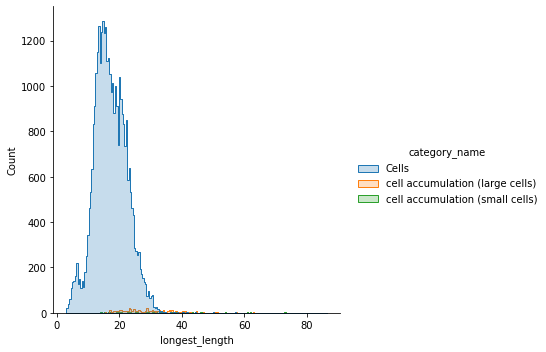

In [14]:
# visualise all cells
DExplorer.plot_displot(df=annot_df, x_col="longest_length", group_by_col="category_name")

       longest_length
count    35043.000000
mean        17.343833
std          5.573164
min          3.100000
25%         13.600000
50%         16.800000
75%         20.855000
max         86.580000


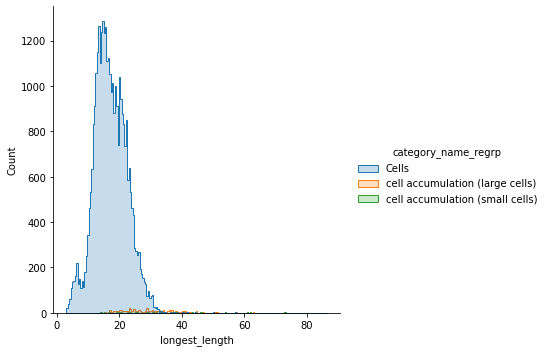

In [15]:
# visualise all cells
DExplorer.plot_displot(df=annot_df, x_col="longest_length", group_by_col="category_name_regrp")

       longest_length
count      657.000000
mean        30.285693
std         10.274299
min         14.100000
25%         23.000000
50%         28.920000
75%         35.800000
max         86.580000


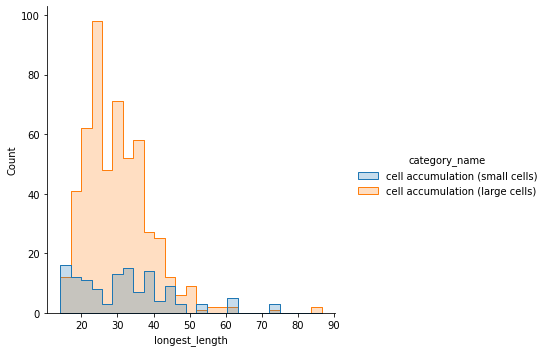

In [16]:
# visualise non cell
annot_cell_accu_small = DExplorer.subset_col_value(df=annot_df, col_name='category_id', col_value=2)
annot_cell_accu_large = DExplorer.subset_col_value(df=annot_df, col_name='category_id', col_value=3)

subset_annot_df = pd.concat([annot_cell_accu_small, annot_cell_accu_large])
DExplorer.plot_displot(df=subset_annot_df, x_col="longest_length", group_by_col="category_name")

# Analyse if the bounding boxes are in square shape

non square    21832
square        13211
Name: square_cat_dp_0, dtype: int64


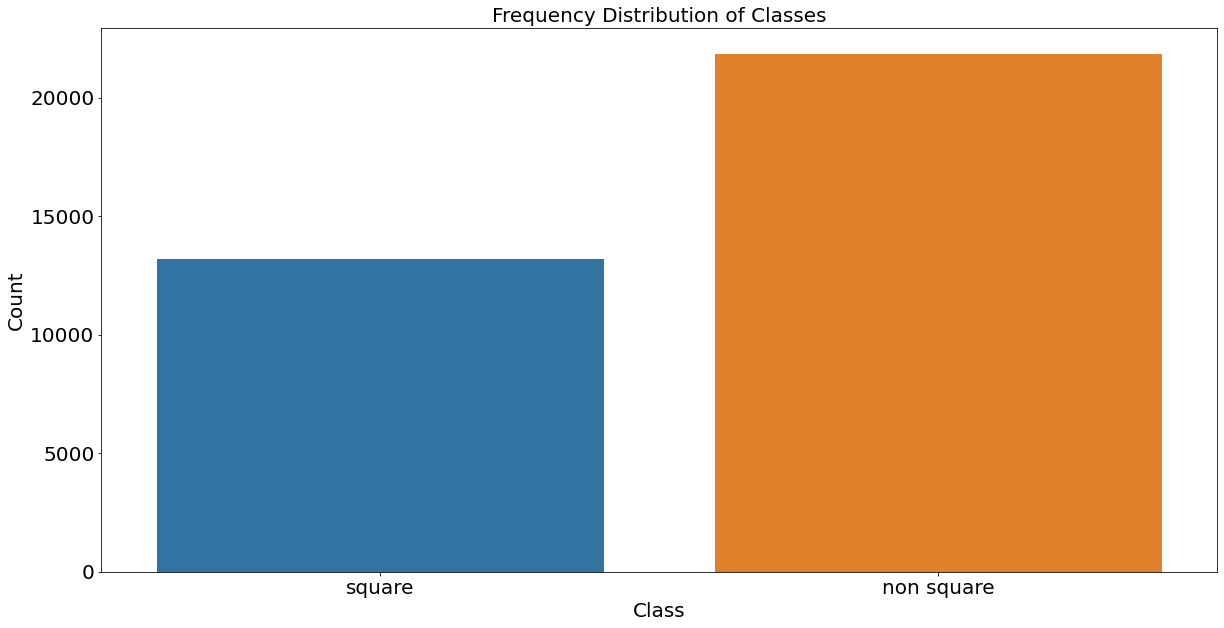

In [17]:
# analyse if the box is usually square 
mapping_dict = {
    0:'square_cat_dp_0', 
    1:'square_cat_dp_1', 
    2:'square_cat_dp_2'
}

for dp, square_name in mapping_dict.items():
    annot_df = DExplorer.get_square(df=annot_df, col_names=['bbox_width', 'bbox_height'], deci_pl=dp, square_col_name=square_name)
    
DExplorer.plot_label_distribution(annot_df, class_col='square_cat_dp_0')

non square    33283
square         1760
Name: square_cat_dp_1, dtype: int64


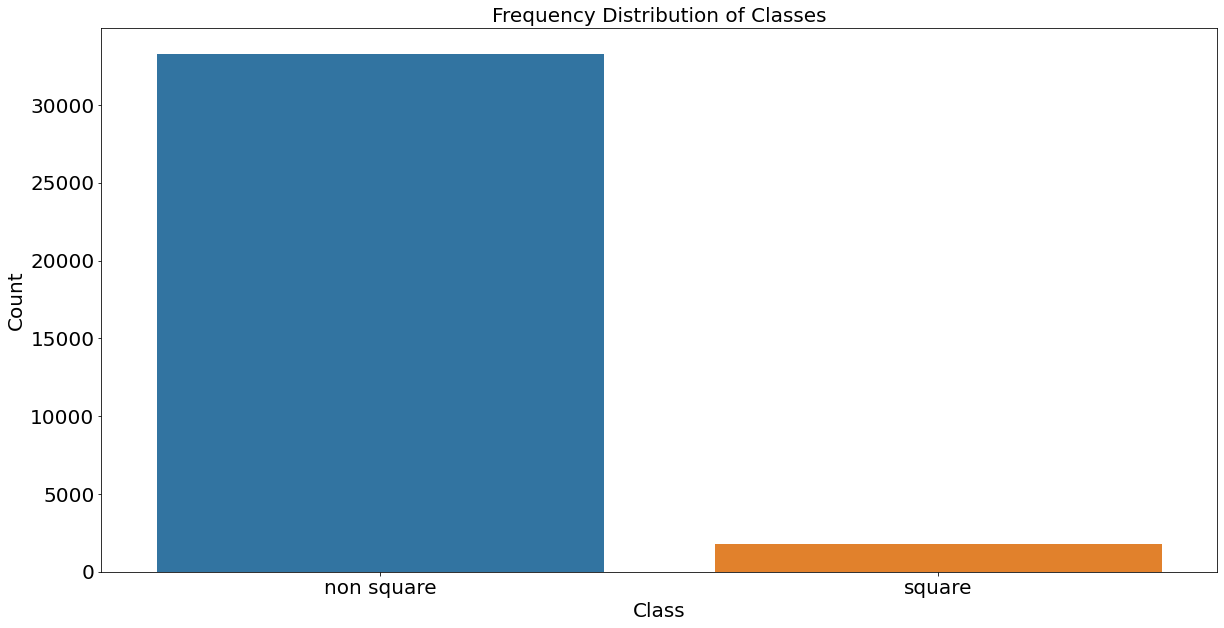

In [18]:
DExplorer.plot_label_distribution(annot_df, class_col='square_cat_dp_1')

non square    33814
square         1229
Name: square_cat_dp_2, dtype: int64


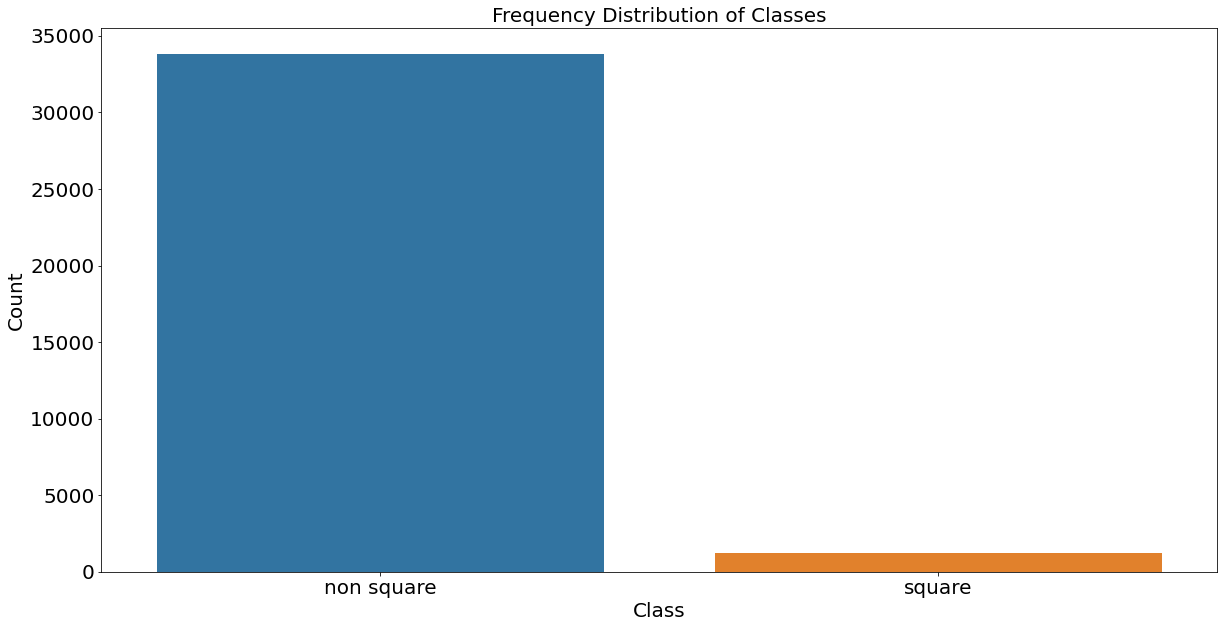

In [19]:
DExplorer.plot_label_distribution(annot_df, class_col='square_cat_dp_2')

## Plotting bounding boxes

In [20]:
# subset the dataframe based on col value
annot_cell_accu_small = DExplorer.subset_col_value(df=annot_df, col_name='category_id', col_value=2)
annot_cell_accu_large = DExplorer.subset_col_value(df=annot_df, col_name='category_id', col_value=3)



#### Images containing label: cell accumulation (small cells)

In [21]:
annot_cell_accu_small['file_name'].unique()

array(['43.jpg', '18.jpg', '35.jpg', '33.jpg', '75.jpg', '74.jpg',
       '73.jpg', '57.jpg', '1 c0.7L d5 20x undilut OD15.jpg', '99.jpg',
       '98.jpg', '97.jpg', '96.jpg', '95.jpg', '94.jpg', '92.jpg',
       '91.jpg', '88.jpg', '86.jpg', '85.jpg', '84.jpg', '80.jpg',
       '78.jpg', '77.jpg', '76.jpg'], dtype=object)

#### Images containing label: cell accumulation (large cells)

In [22]:
annot_cell_accu_large['file_name'].unique()

array(['55.jpg', '54.jpg', '53.jpg', '52.jpg', '51.jpg', '50.jpg',
       '49.jpg', '48.jpg', '47.jpg', '46.jpg', '45.jpg', '43.jpg',
       '42.jpg', '41.jpg', '39.jpg', '38.jpg', '37.jpg', '36.jpg',
       '9.jpg', '8.jpg', '24.jpg', '20.jpg', '18.jpg', '17.jpg', '16.jpg',
       '15.jpg', '13.jpg', '12.jpg', '11.jpg', '10.jpg', '35.jpg',
       '34.jpg', '33.jpg', '32.jpg', '31.jpg', '30.jpg', '29.jpg',
       '28.jpg', '74.jpg', '72.jpg', '70.jpg', '68.jpg', '67.jpg',
       '66.jpg', '65.jpg', '64.jpg', '63.jpg', '62.jpg', '61.jpg',
       '60.jpg', '58.jpg', '57.jpg', '56.jpg',
       '6 c3 from agar plate 100mL bottle d1 20x undilut.jpg',
       '4 c1 from agar plate 100mL bottle d1 20x undilut.jpg',
       '2 c0.7L d5 20x 100xdilut OD15.jpg',
       '1 c0.7L d5 20x undilut OD15.jpg', '97.jpg', '95.jpg', '91.jpg',
       '90.jpg', '88.jpg', '87.jpg', '85.jpg', '84.jpg', '83.jpg',
       '82.jpg', '81.jpg', '80.jpg', '78.jpg', '77.jpg'], dtype=object)

#### Plotting large cell accumulations only

In [23]:
large_file_name = '34.jpg'
img_accu_large = DExplorer.subset_col_value(df=annot_df, col_name='file_name', col_value=large_file_name) 
img_accu_large

,image_id,category_id,area,width,height,file_name,category_name,bbox_x,bbox_y,bbox_width,...,longest_length,bbox_width_dp_0,bbox_height_dp_0,square_cat_dp_0,bbox_width_dp_1,bbox_height_dp_1,square_cat_dp_1,bbox_width_dp_2,bbox_height_dp_2,square_cat_dp_2
11220,2,1,163.296,1920,1080,34.jpg,Cells,258.10,24.39,12.96,...,12.96,13.0,13.0,square,13.0,12.6,non square,12.96,12.60,non square
11221,2,1,123.200,1920,1080,34.jpg,Cells,61.24,163.62,11.20,...,11.20,11.0,11.0,square,11.2,11.0,non square,11.20,11.00,non square
11222,2,1,420.250,1920,1080,34.jpg,Cells,206.16,270.16,20.50,...,20.50,20.0,20.0,square,20.5,20.5,square,20.50,20.50,square
11223,2,1,133.994,1920,1080,34.jpg,Cells,226.86,283.80,11.90,...,11.90,12.0,11.0,non square,11.9,11.3,non square,11.90,11.26,non square
11224,2,1,252.320,1920,1080,34.jpg,Cells,190.46,295.76,16.60,...,16.60,17.0,15.0,non square,16.6,15.2,non square,16.60,15.20,non square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12527,2,1,183.580,1920,1080,34.jpg,Cells,999.86,764.77,13.70,...,13.70,14.0,13.0,non square,13.7,13.4,non square,13.70,13.40,non square
12528,2,1,178.160,1920,1080,34.jpg,Cells,979.14,690.25,13.60,...,13.60,14.0,13.0,non square,13.6,13.1,non square,13.60,13.10,non square
13410,2,3,903.715,1920,1080,34.jpg,cell accumulation (large cells),1042.79,129.20,30.50,...,30.50,30.0,30.0,square,30.5,29.6,non square,30.50,29.63,non square
13411,2,3,313.760,1920,1080,34.jpg,cell accumulation (large cells),1299.04,209.91,21.20,...,21.20,21.0,15.0,non square,21.2,14.8,non square,21.20,14.80,non square


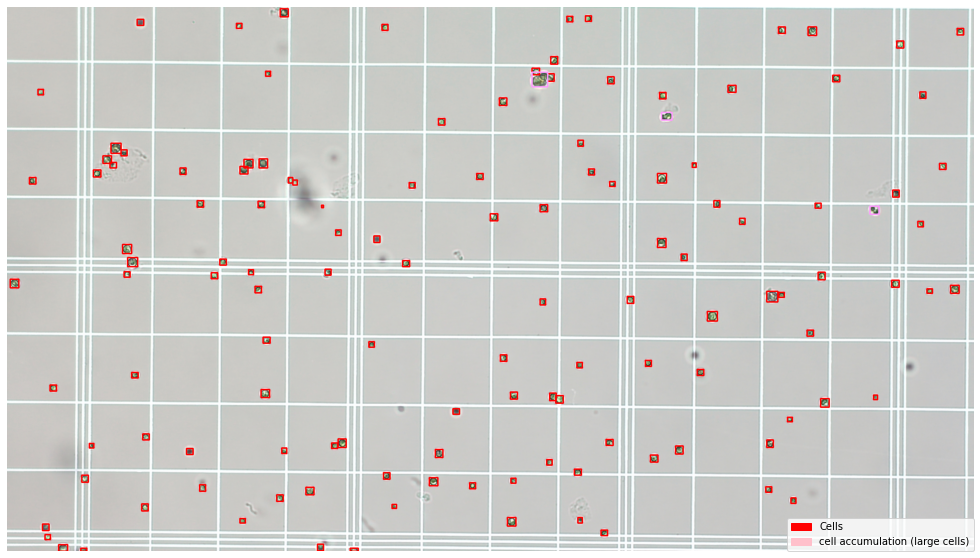

In [24]:
img_path = os.path.join(RAW_IMG_DIR, large_file_name)

DExplorer.show_annotated_image(
        img_path=img_path,
        annot_df=img_accu_large,
        box_colours_names=["red", "orange", "pink"],
        line_thickness=2,
        plot_dim=(20, 10),
)

#### Plotting small cell accumulations only

In [25]:
small_file_name = '75.jpg'
img_accu_small = DExplorer.subset_col_value(df=annot_df, col_name='file_name', col_value=small_file_name) 
img_accu_small

,image_id,category_id,area,width,height,file_name,category_name,bbox_x,bbox_y,bbox_width,...,longest_length,bbox_width_dp_0,bbox_height_dp_0,square_cat_dp_0,bbox_width_dp_1,bbox_height_dp_1,square_cat_dp_1,bbox_width_dp_2,bbox_height_dp_2,square_cat_dp_2
13452,1,2,513.7825,1920,1080,75.jpg,cell accumulation (small cells),230.16,398.28,29.75,...,29.75,30.0,17.0,non square,29.8,17.3,non square,29.75,17.27,non square
13453,1,2,276.5184,1920,1080,75.jpg,cell accumulation (small cells),623.55,757.42,15.16,...,18.24,15.0,18.0,non square,15.2,18.2,non square,15.16,18.24,non square
13462,1,1,301.5960,1920,1080,75.jpg,Cells,1754.46,605.71,16.40,...,18.39,16.0,18.0,non square,16.4,18.4,non square,16.40,18.39,non square
13463,1,1,393.8000,1920,1080,75.jpg,Cells,1696.86,583.71,20.00,...,20.00,20.0,20.0,square,20.0,19.7,non square,20.00,19.69,non square
13464,1,1,463.1850,1920,1080,75.jpg,Cells,1847.05,1022.32,21.15,...,21.90,21.0,22.0,non square,21.2,21.9,non square,21.15,21.90,non square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13534,1,1,12.2100,1920,1080,75.jpg,Cells,713.70,616.46,3.70,...,3.70,4.0,3.0,non square,3.7,3.3,non square,3.70,3.30,non square
13535,1,1,501.9420,1920,1080,75.jpg,Cells,767.30,518.79,23.80,...,23.80,24.0,21.0,non square,23.8,21.1,non square,23.80,21.09,non square
13536,1,1,13.2600,1920,1080,75.jpg,Cells,992.27,542.77,3.90,...,3.90,4.0,3.0,non square,3.9,3.4,non square,3.90,3.40,non square
13537,1,1,343.8000,1920,1080,75.jpg,Cells,1032.82,393.96,18.00,...,19.10,18.0,19.0,non square,18.0,19.1,non square,18.00,19.10,non square


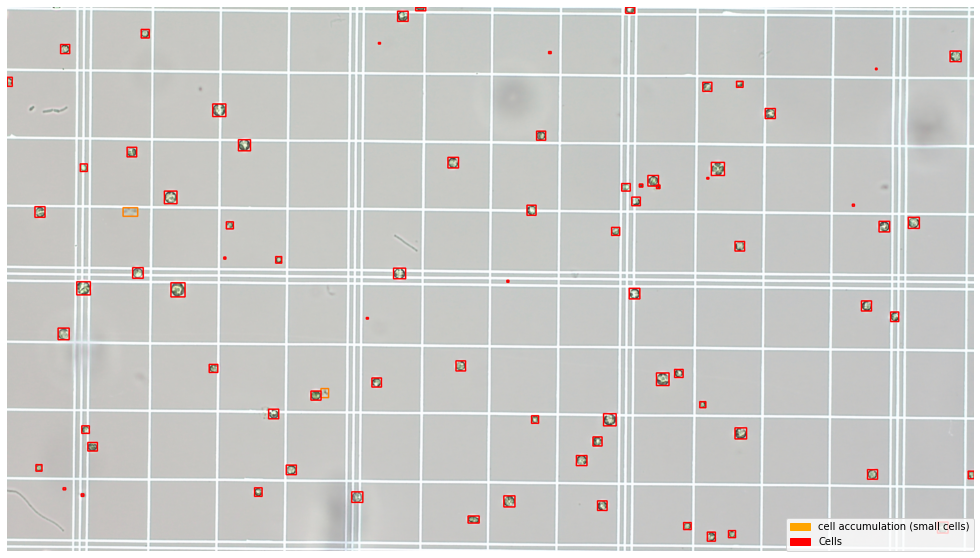

In [26]:
img_path = os.path.join(RAW_IMG_DIR, small_file_name)


DExplorer.show_annotated_image(
        img_path=img_path,
        annot_df=img_accu_small,
        box_colours_names=["red", "orange", "pink"],
        line_thickness=2,
        plot_dim=(20, 10),
)

#### Plotting all labels

In [27]:
file_name = '78.jpg'
img_cell = DExplorer.subset_col_value(df=annot_df, col_name='file_name', col_value=file_name) 
# img_cell = annot_df[annot_df['file_name']==file_name]
img_cell

,image_id,category_id,area,width,height,file_name,category_name,bbox_x,bbox_y,bbox_width,...,longest_length,bbox_width_dp_0,bbox_height_dp_0,square_cat_dp_0,bbox_width_dp_1,bbox_height_dp_1,square_cat_dp_1,bbox_width_dp_2,bbox_height_dp_2,square_cat_dp_2
28085,22,1,531.2400,1920,1080,78.jpg,Cells,365.71,408.38,22.80,...,23.30,23.0,23.0,square,22.8,23.3,non square,22.80,23.30,non square
28086,22,1,744.5730,1920,1080,78.jpg,Cells,325.89,238.54,26.31,...,28.30,26.0,28.0,non square,26.3,28.3,non square,26.31,28.30,non square
28087,22,1,74.7000,1920,1080,78.jpg,Cells,65.52,375.23,8.30,...,9.00,8.0,9.0,non square,8.3,9.0,non square,8.30,9.00,non square
28088,22,1,205.8000,1920,1080,78.jpg,Cells,65.63,458.99,14.70,...,14.70,15.0,14.0,non square,14.7,14.0,non square,14.70,14.00,non square
28089,22,1,775.5600,1920,1080,78.jpg,Cells,269.74,53.87,27.60,...,28.10,28.0,28.0,square,27.6,28.1,non square,27.60,28.10,non square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,22,1,500.8640,1920,1080,78.jpg,Cells,731.40,813.44,22.36,...,22.40,22.0,22.0,square,22.4,22.4,square,22.36,22.40,non square
34664,22,1,348.0000,1920,1080,78.jpg,Cells,733.46,793.74,20.00,...,20.00,20.0,17.0,non square,20.0,17.4,non square,20.00,17.40,non square
34665,22,1,467.8544,1920,1080,78.jpg,Cells,996.12,716.92,21.58,...,21.68,22.0,22.0,square,21.6,21.7,non square,21.58,21.68,non square
34989,22,2,1052.6000,1920,1080,78.jpg,cell accumulation (small cells),1523.00,268.20,38.00,...,38.00,38.0,28.0,non square,38.0,27.7,non square,38.00,27.70,non square


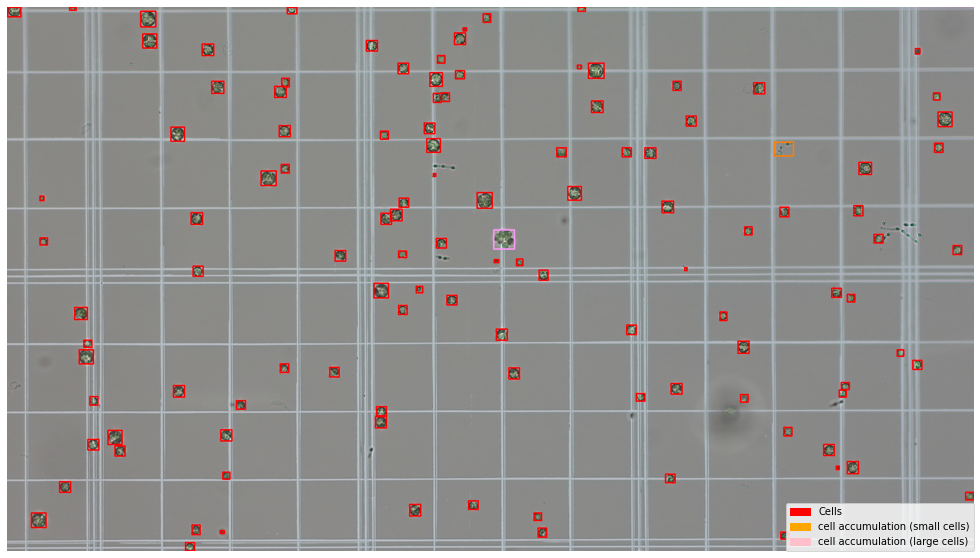

In [28]:
img_path = os.path.join(RAW_IMG_DIR, file_name)
DExplorer.show_annotated_image(
        img_path=img_path,
        annot_df=img_cell,
        box_colours_names=["red", "orange", "pink"],
        line_thickness=2,
        plot_dim=(20, 10),
)

Image: /polyaxon-v1-data/workspaces/kwanchet/data/life3-aut0/raw/78.jpg


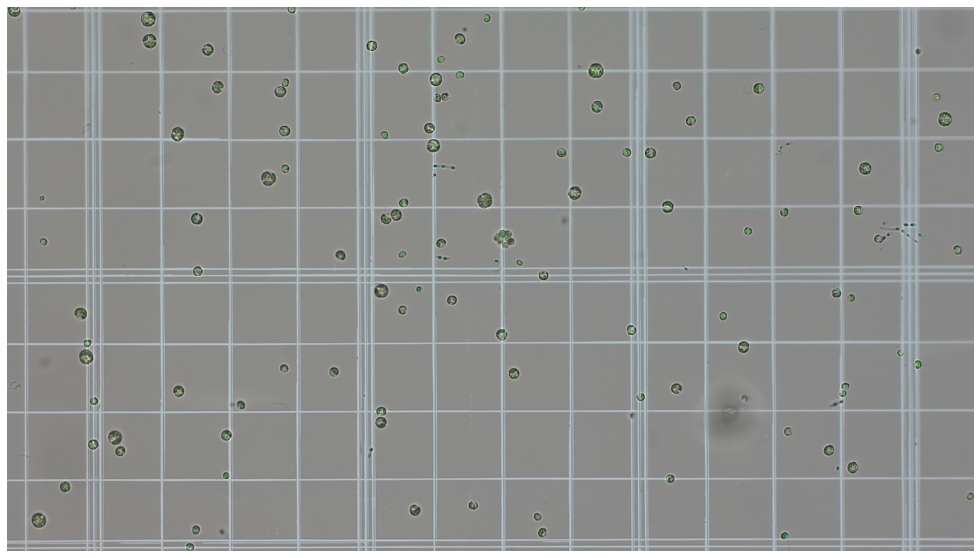

In [29]:
img = DExplorer.show_image(img_path)

In [30]:
annot_df["bb_area"] = annot_df["bbox_width"] * annot_df["bbox_height"]
annot_cell_accu_small = DExplorer.subset_col_value(df=annot_df, col_name='category_id', col_value=2)
annot_cell_accu_large = DExplorer.subset_col_value(df=annot_df, col_name='category_id', col_value=3)

subset_annot_df = pd.concat([annot_cell_accu_small, annot_cell_accu_large])
annot_df


,image_id,category_id,area,width,height,file_name,category_name,bbox_x,bbox_y,bbox_width,...,bbox_width_dp_0,bbox_height_dp_0,square_cat_dp_0,bbox_width_dp_1,bbox_height_dp_1,square_cat_dp_1,bbox_width_dp_2,bbox_height_dp_2,square_cat_dp_2,bb_area
0,1,1,254.340,1920,1080,55.jpg,Cells,929.35,347.72,15.70,...,16.0,16.0,square,15.7,16.2,non square,15.70,16.20,non square,254.340
1,1,1,200.830,1920,1080,55.jpg,Cells,898.51,268.14,13.30,...,13.0,15.0,non square,13.3,15.1,non square,13.30,15.10,non square,200.830
2,1,1,175.140,1920,1080,55.jpg,Cells,816.00,226.40,12.60,...,13.0,14.0,non square,12.6,13.9,non square,12.60,13.90,non square,175.140
3,1,1,226.953,1920,1080,55.jpg,Cells,834.49,150.77,15.10,...,15.0,15.0,square,15.1,15.0,non square,15.10,15.03,non square,226.953
4,1,1,268.800,1920,1080,55.jpg,Cells,817.64,99.86,16.00,...,16.0,17.0,non square,16.0,16.8,non square,16.00,16.80,non square,268.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35038,19,3,256.289,1920,1080,81.jpg,cell accumulation (large cells),1620.04,190.30,20.26,...,20.0,13.0,non square,20.3,12.6,non square,20.26,12.65,non square,256.289
35039,20,3,596.960,1920,1080,80.jpg,cell accumulation (large cells),1839.40,708.20,32.80,...,33.0,18.0,non square,32.8,18.2,non square,32.80,18.20,non square,596.960
35040,22,3,1518.440,1920,1080,78.jpg,cell accumulation (large cells),966.92,442.68,40.60,...,41.0,37.0,non square,40.6,37.4,non square,40.60,37.40,non square,1518.440
35041,23,3,1417.400,1920,1080,77.jpg,cell accumulation (large cells),884.28,446.39,38.00,...,38.0,37.0,non square,38.0,37.3,non square,38.00,37.30,non square,1417.400


            bb_area
count  35043.000000
mean     309.265939
std      208.755302
min        9.280000
25%      170.180000
50%      262.190000
75%      412.270250
max     6298.704000


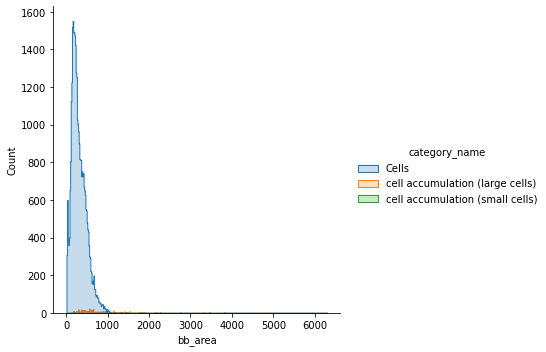

In [31]:
DExplorer.plot_displot(df=annot_df, x_col="bb_area", group_by_col="category_name")

           bb_area
count   657.000000
mean    809.439723
std     622.128893
min     134.616000
25%     412.020000
50%     649.880000
75%    1025.240000
max    6298.704000


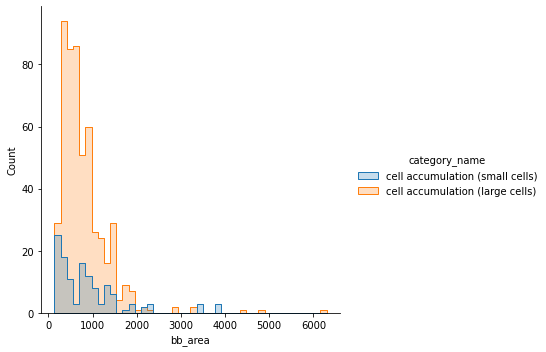

In [32]:
DExplorer.plot_displot(df=subset_annot_df, x_col="bb_area", group_by_col="category_name")

In [33]:
# get average bb area
avg_bb_area = annot_df["bb_area"].describe()[1]

# get img size
img_height, img_width, _ = img.shape
img_area = img_height * img_width

# proportion of bb area / img size
bb_area_prop = avg_bb_area / img_area
print("the proportion of a bb box over an image is: {} %".format(bb_area_prop * 100))

the proportion of a bb box over an image is: 0.01491444538318862 %


# Findings

### Class distribution and Class distribution (after combining cell accumulations)

the class distributions show highly imbalanced distributions where the cell class dominates with an overwhelming of 98% (or 34386) of the instances wheresa large cell accumulation () and small cell accumulation have
1.5% (or 531) and 0.35% (or 126) instances respectively.

Highly imbalanced distribution
Lower expectation of minor class prediction like ‘cell accumulation large’ or ‘cell accumulation small’
Minor classes contribute to model’s ability to discern between different classes 

### Bounding box midpoint distribution

The bounding box midpoints, in general, vary
This observation is similar across classes
This means that the bounding boxes are found over all the images


### Bounding box size distribution

Most of the cell instances are smaller than cell accumulation
Some cell accumulation (small cells) may be larger than (large cells)

### Bounding box longest length distribution

Understand the distribution of the longest length


### Bounding box Square Analysis

Average area of the bounding box: 309
Average image (1080x1920) size: 2073600 
Average bounding box area proportion: ~0.01%
